In [ ]:
from sklearn.datasets import make_classification
import torch
import numpy as np
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=10**3, n_features=10 ,random_state=42)


X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)

In [ ]:
class LogisticRegression(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        x = self.linear(x)
        y_pred = torch.sigmoid(x)
        return y_pred


inputDim = X_train.shape[1]
outputDim = y_train.shape[1]
learningRate = 0.01
epochs = 100

model = LogisticRegression(inputDim, outputDim)

In [ ]:
#criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
criterion = torch.nn.BCELoss()

In [ ]:
a = model(X_train[:2])

In [ ]:
a

In [ ]:
loss = criterion(a, y_train[0:2])

In [ ]:
loss

In [ ]:

# training loop
num_epochs = 200

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 25 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

In [ ]:
with torch.no_grad():
    y_predicted = model(X_train)  # no need to call model.forward()
    y_predicted_cls = y_predicted.round()   # round off to nearest class
    acc = y_predicted_cls.eq(y_train).sum() / float(y_train.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')

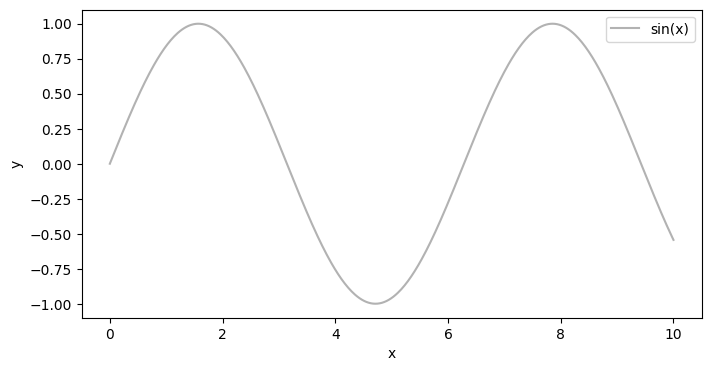

In [1]:
import torch
x = torch.linspace(0,10,500)
y = torch.sin(x)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(x, y, color="tab:grey", alpha=0.6, label="sin(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [8]:
y

tensor([ 0.0000,  0.0200,  0.0401,  0.0601,  0.0801,  0.1000,  0.1200,  0.1398,
         0.1596,  0.1794,  0.1991,  0.2187,  0.2382,  0.2576,  0.2769,  0.2961,
         0.3152,  0.3341,  0.3529,  0.3716,  0.3902,  0.4085,  0.4267,  0.4448,
         0.4626,  0.4803,  0.4978,  0.5151,  0.5321,  0.5490,  0.5656,  0.5820,
         0.5982,  0.6142,  0.6299,  0.6453,  0.6605,  0.6754,  0.6900,  0.7044,
         0.7185,  0.7323,  0.7458,  0.7590,  0.7719,  0.7844,  0.7967,  0.8087,
         0.8203,  0.8316,  0.8426,  0.8532,  0.8635,  0.8734,  0.8830,  0.8922,
         0.9011,  0.9096,  0.9177,  0.9255,  0.9329,  0.9399,  0.9466,  0.9529,
         0.9587,  0.9643,  0.9694,  0.9741,  0.9784,  0.9824,  0.9859,  0.9891,
         0.9918,  0.9942,  0.9961,  0.9977,  0.9989,  0.9996,  1.0000,  0.9999,
         0.9995,  0.9986,  0.9974,  0.9957,  0.9937,  0.9912,  0.9884,  0.9851,
         0.9815,  0.9774,  0.9730,  0.9682,  0.9630,  0.9574,  0.9514,  0.9451,
         0.9383,  0.9312,  0.9237,  0.91

In [13]:
(y + 0.1*(torch.rand(500) -0.5)).view(-1,1)

tensor([[-0.0056],
        [-0.0162],
        [ 0.0745],
        [ 0.0534],
        [ 0.0909],
        [ 0.0974],
        [ 0.0877],
        [ 0.1128],
        [ 0.1871],
        [ 0.1667],
        [ 0.2139],
        [ 0.1877],
        [ 0.2292],
        [ 0.2291],
        [ 0.3061],
        [ 0.2577],
        [ 0.3596],
        [ 0.3161],
        [ 0.3474],
        [ 0.3732],
        [ 0.4109],
        [ 0.3788],
        [ 0.3812],
        [ 0.4138],
        [ 0.5085],
        [ 0.4971],
        [ 0.5123],
        [ 0.4901],
        [ 0.5118],
        [ 0.5905],
        [ 0.5192],
        [ 0.6178],
        [ 0.5896],
        [ 0.5871],
        [ 0.6222],
        [ 0.6526],
        [ 0.6134],
        [ 0.6717],
        [ 0.7379],
        [ 0.6970],
        [ 0.6965],
        [ 0.7027],
        [ 0.7437],
        [ 0.8057],
        [ 0.7320],
        [ 0.8269],
        [ 0.8025],
        [ 0.8110],
        [ 0.8457],
        [ 0.8508],
        [ 0.8807],
        [ 0.8828],
        [ 0.

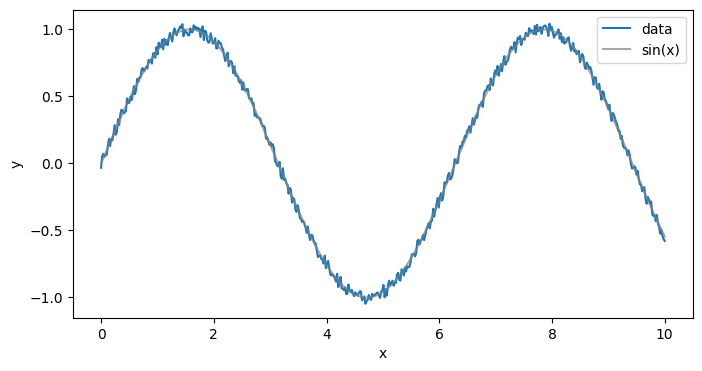

In [10]:
X = x.view(-1,1)
Y = y.view(-1,1) + 0.1*(torch.rand(500).view(-1,1) - 0.5)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(X, Y, label="data")
plt.plot(X, y.view(-1,1), color="grey", alpha=0.7,   label="sin(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
